# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Diego Felipe Diaz Perez
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
import scipy.integrate as sct
import math as mt
import matplotlib.pyplot as plt
import sympy as sp

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

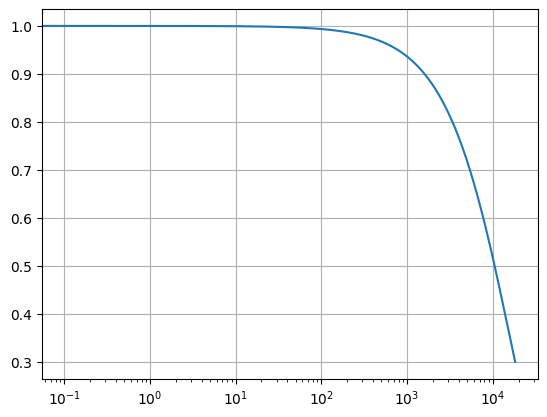

In [2]:
ls_a= 28.78
ly_d= 2.67
ls_d=ls_a*365
ls=np.log(2)/ls_d
ly=np.log(2)/ly_d
ns0=1
ny0=0
t_a= 50
t_df=t_a*365
h=0.1
t = np.arange(0, t_df+h, h)
ns= np.zeros_like(t)
ny= np.zeros_like(t)
ns[0]= ns0
ny[0]= ny0
for i in range(1, len(t)):
  dns= -ls*ns[i-1]
  dny= -ly*ny[i-1]-dns
  ns[i] = ns[i-1]+dns*h
  ny[i] = ny[i-1]+dny*h
rs= (ls*ns)/(ls*ns0)
ry= (ly*ny)/(ls*ns0)
plt.plot(t,rs)
plt.xscale('log')
plt.grid()

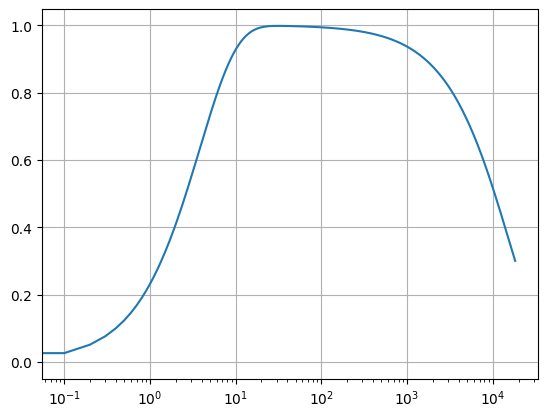

In [3]:
plt.plot(t,ry)
plt.xscale('log')
plt.grid()

# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

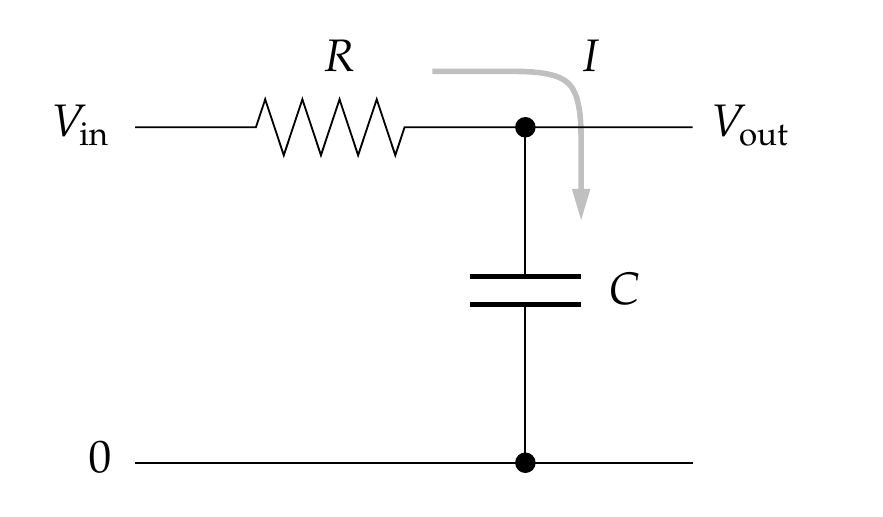

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

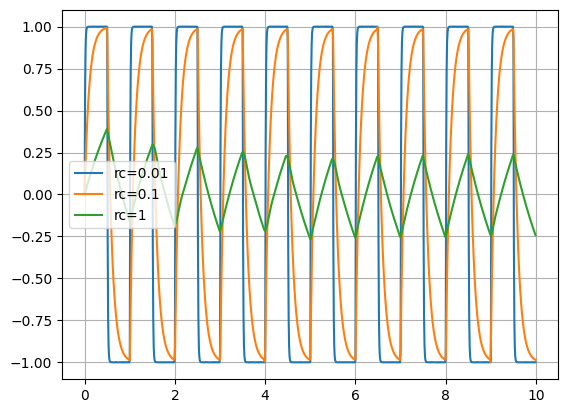

In [4]:
def vin(t):
  floor_2t = mt.floor(2*t)
  if floor_2t == 0:
    return 1
  elif floor_2t % 2 == 0:
    return 1
  else:
    return -1
rc=np.array([0.01,0.1,1])
def f1(t,vout):
  return 1/rc[0]*(vin(t)-vout)
def f2(t,vout):
  return 1/rc[1]*(vin(t)-vout)
def f3(t,vout):
  return 1/rc[2]*(vin(t)-vout)
vout0=np.array([0.])
t=(1e-8,10)
h=0.01
s1=sct.solve_ivp(f1,t,vout0,t_eval=np.arange(1e-8,10,h))
s2=sct.solve_ivp(f2,t,vout0,t_eval=np.arange(1e-8,10,h))
s3=sct.solve_ivp(f3,t,vout0,t_eval=np.arange(1e-8,10,h))
plt.plot(s1.t,s1.y[0],label="rc=0.01")
plt.plot(s2.t,s2.y[0],label="rc=0.1")
plt.plot(s3.t,s3.y[0],label="rc=1")
plt.legend()
plt.grid()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

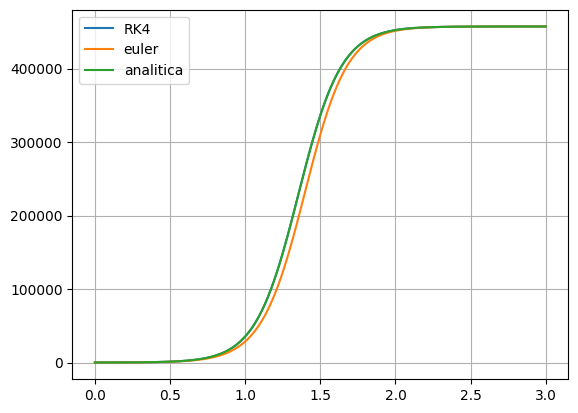

In [5]:
#a
def euler_v(f,t0,tf,y0,h):
  n=int((tf-t0)/h)
  tn=np.zeros(n+1, dtype=float)
  m=len(y0)
  yn=np.zeros((m,n+1),dtype=float)
  yn[:,0]=y0
  tn[0]=t0
  for k in range(n):
    tn[k+1]=tn[k]+h
    yn[:,k+1]=yn[:,k]+h*f(tn[k],yn[:,k])
  return tn,yn
p=np.random.randint(1,100)
r=np.random.randint(1,10)
k=np.random.randint(1,1000000)
p0=np.array([p])
def f(t,p0):
  return r*p0*(1-(p0/k))
t_s=(0,3)
t0=0
tf=3
h=0.01
t_eval=np.arange(t0,tf+h,h)
s=sct.solve_ivp(f,t_s,p0,t_eval=t_eval)
e=euler_v(f,t0,tf,p0,h)
def p_a(t, p0, r, k):
  return (k*p0*np.exp(r*t))/(k+p0*(np.exp(r*t)-1))
ps=p_a(t_eval, p0[0], r, k)
plt.plot(s.t,s.y[0],label="RK4")
plt.plot(e[0],e[1][0],label="euler")
plt.plot(t_eval,ps,label="analitica")
plt.legend()
plt.grid()

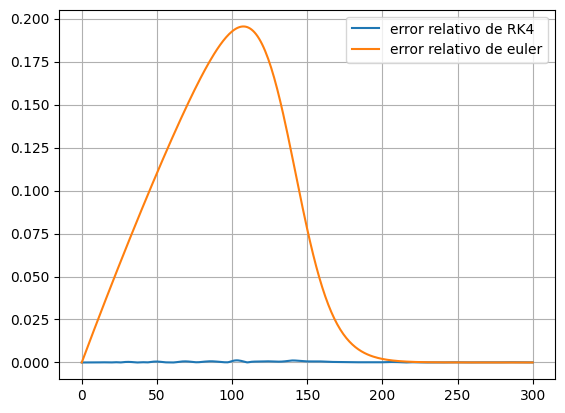

In [6]:
#b
errk=abs((s.y[0]-ps)/ps)
erre=abs((e[1][0]-ps)/ps)
n=np.arange(0,len(errk))
plt.plot(n,errk,label="error relativo de RK4")
plt.plot(n,erre,label="error relativo de euler")
plt.legend()
plt.grid()

# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

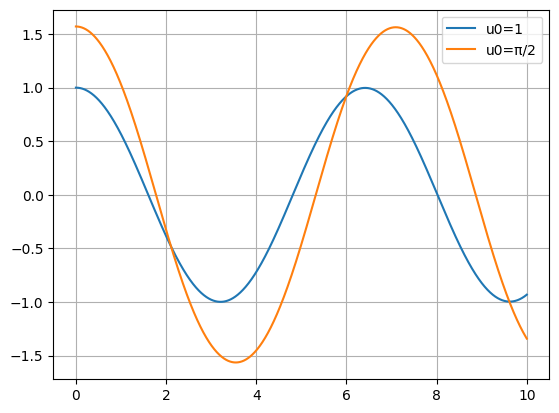

In [7]:
#a
g=9.8
l=np.random.randint(1,10)
def f(t,u0):
  x,v=u0
  dx=v
  dv=-g/l*np.sin(x)
  return np.array([dx,dv])
u01=np.array([1,0])
u02=np.array([np.pi/2,0])
t=(0,10)
h=0.001
s1=sct.solve_ivp(f,t,u01,t_eval=np.arange(0,10+h,h))
s2=sct.solve_ivp(f,t,u02,t_eval=np.arange(0,10+h,h))
plt.plot(s1.t,s1.y[0],label="u0=1")
plt.plot(s2.t,s2.y[0],label="u0=π/2")
plt.legend()
plt.grid()

/tmp/ipython-input-1655060149.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(((1-z**2)*(1-a*z**2))**(1/2))
/tmp/ipython-input-1655060149.py:9: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  k=sct.quad(f_quad,0,1)[0]


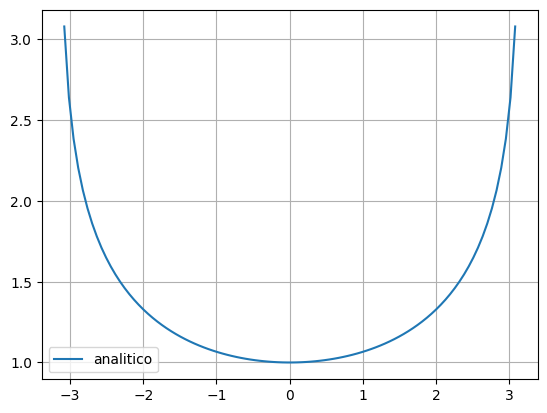

In [8]:
#b
u=np.linspace(-np.pi,np.pi,100)
T_a=[]
for u0_val in u:
  t0=(l/g)**(1/2)
  a=(np.sin(u0_val/2))**2
  def f_quad(z):
    return 1/(((1-z**2)*(1-a*z**2))**(1/2))
  k=sct.quad(f_quad,0,1)[0]
  t=t0*(2/np.pi)*k
  T_a.append(t/t0)
plt.plot(u,T_a,label="analitico")
plt.grid()
plt.legend()

# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

Text(0.5, 1.0, 'grafica por euler')

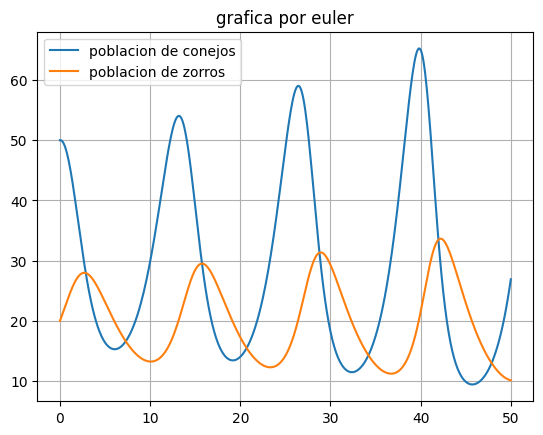

In [9]:
#a
a=0.8
b=0.04
r=0.3
d=0.01
def f(t,y0):
  x,y=y0
  dx=a*x-b*x*y
  dy=-r*y+d*x*y
  return np.array([dx,dy],dtype=float)
y0=np.array([50,20],dtype=float)
t0=0
tf=50
h=0.1
te,yne=euler_v(f,t0,tf,y0,h)
plt.plot(te,yne[0],label="poblacion de conejos")
plt.plot(te,yne[1],label="poblacion de zorros")
plt.legend()
plt.grid()
plt.title("grafica por euler")

Text(0.5, 1.0, 'grafica por RK2')

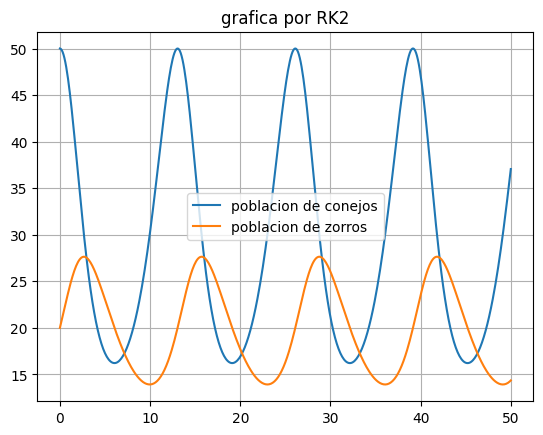

In [10]:
#b
def runge_kutta(f,t0,tf,y0,h):
  a1,a2,p1,p2=0,1,1/2,1/2
  n=int((tf-t0)/h)
  tn=np.zeros(n+1,dtype=float)
  m=len(y0)
  yn=np.zeros((m,n+1),dtype=float)
  yn[:,0]=y0
  tn[0]=t0
  for k in range(n):
    tn[k+1]=tn[k]+h
    k1=f(tn[k],yn[:,k])
    k2=f(tn[k]+p1*h,yn[:,k]+p2*h*k1)
    yn[:,k+1]=yn[:,k]+h*k2
  return tn,yn
trk2,ynrk2=runge_kutta(f,t0,tf,y0,h)
plt.plot(trk2,ynrk2[0],label="poblacion de conejos")
plt.plot(trk2,ynrk2[1],label="poblacion de zorros")
plt.legend()
plt.grid()
plt.title("grafica por RK2")

Text(0.5, 1.0, 'grafica por RK4')

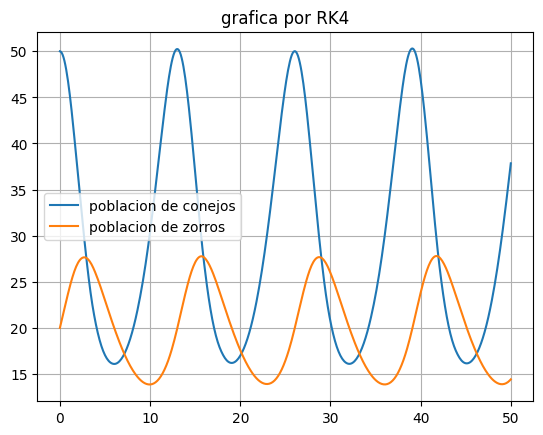

In [11]:
t_s=(0,50)
s=sct.solve_ivp(f,t_s,y0,t_eval=np.arange(0,50+h,h))
plt.plot(s.t,s.y[0],label="poblacion de conejos")
plt.plot(s.t,s.y[1],label="poblacion de zorros")
plt.legend()
plt.grid()
plt.title("grafica por RK4")

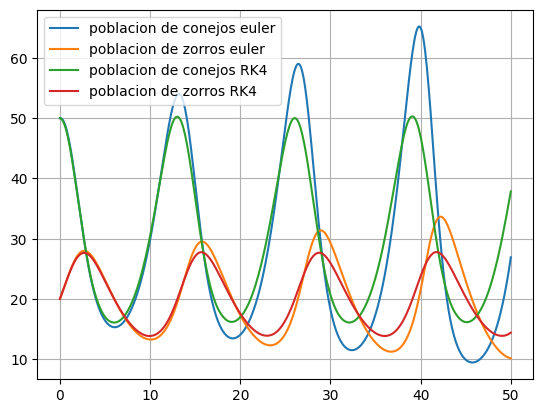

In [12]:
#c.1
plt.plot(te,yne[0],label="poblacion de conejos euler")
plt.plot(te,yne[1],label="poblacion de zorros euler")
plt.plot(s.t,s.y[0],label="poblacion de conejos RK4")
plt.plot(s.t,s.y[1],label="poblacion de zorros RK4")
plt.legend()
plt.grid()

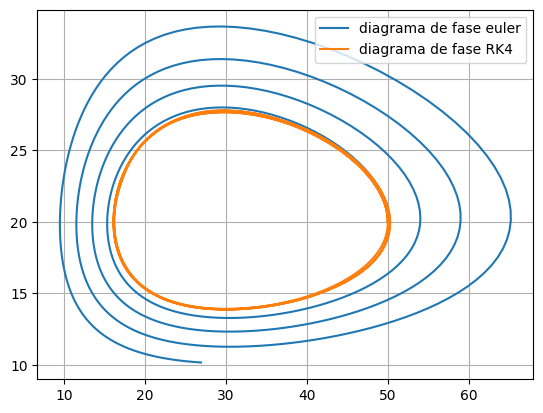

In [13]:
#c.2
plt.plot(yne[0],yne[1],label="diagrama de fase euler")
plt.plot(s.y[0],s.y[1],label="diagrama de fase RK4")
plt.legend()
plt.grid()

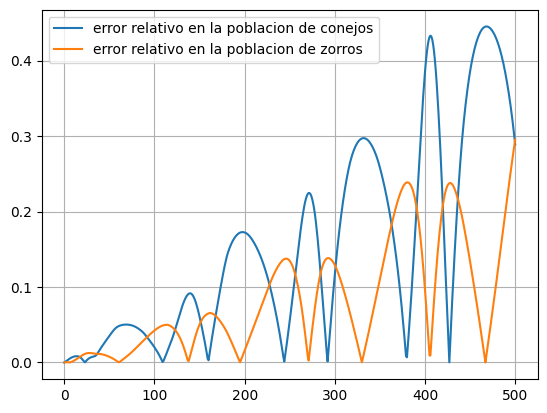

In [14]:
#c.3
errx=abs((yne[0]-s.y[0])/s.y[0])
erry=abs((yne[1]-s.y[1])/s.y[1])
n=np.arange(0,len(errx))
plt.plot(n,errx,label="error relativo en la poblacion de conejos")
plt.plot(n,erry,label="error relativo en la poblacion de zorros")
plt.grid()
plt.legend()

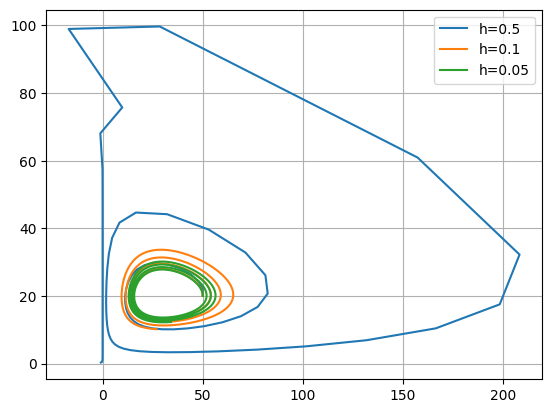

In [15]:
#d.1
h1=0.5
h2=0.1
h3=0.05
teh1,yneh1=euler_v(f,t0,tf,y0,h1)
teh2,yneh2=euler_v(f,t0,tf,y0,h2)
teh3,yneh3=euler_v(f,t0,tf,y0,h3)
plt.plot(yneh1[0],yneh1[1],label="h=0.5")
plt.plot(yneh2[0],yneh2[1],label="h=0.1")
plt.plot(yneh3[0],yneh3[1],label="h=0.05")
plt.grid()
plt.legend()
#se puede ver que a menor sea el h el diagrama de fase se estabiliza mas y por ende tambien el metodo, esto ocurre ya que euler es muy subseptible al h y este al ser menor mas puntos puede calcular por lo que hay menos errores y por ende mas estabilidad

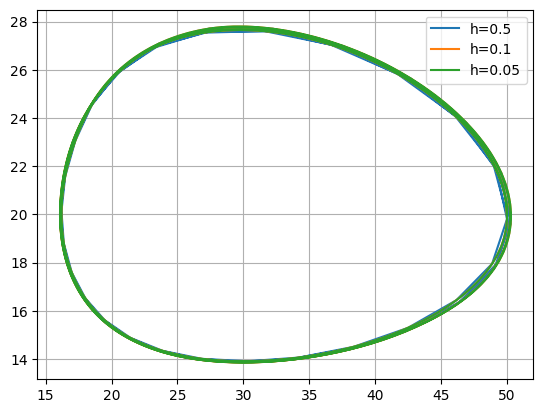

In [16]:
#d.2
sh1=sct.solve_ivp(f,t_s,y0,t_eval=np.arange(0,50+h1,h1))
sh2=sct.solve_ivp(f,t_s,y0,t_eval=np.arange(0,50+h2,h2))
sh3=sct.solve_ivp(f,t_s,y0,t_eval=np.arange(0,50+h3,h3))
plt.plot(sh1.y[0],sh1.y[1],label="h=0.5")
plt.plot(sh2.y[0],sh2.y[1],label="h=0.1")
plt.plot(sh3.y[0],sh3.y[1],label="h=0.05")
plt.grid()
plt.legend()
# RK4 se establiza muy rapido a pesar de tener un h relativamente grande ya que este metodo tiene un orden de convergencia mucho mayor que euler y por ende no depende mucho del h su estabilidad

Text(0.5, 1.0, 'poblacion de conejos')

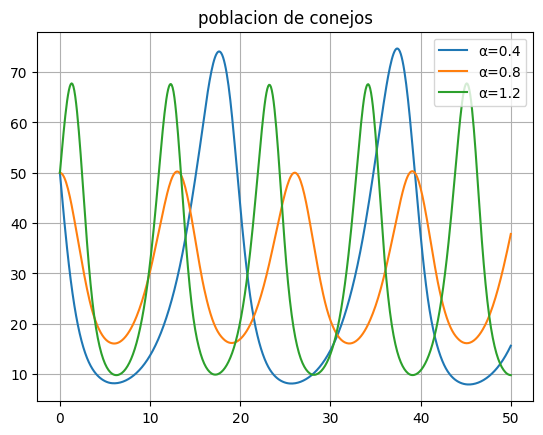

In [17]:
a1=0.4
a2=0.8
a3=1.2
def fa1(t,y0):
  x,y=y0
  dx=a1*x-b*x*y
  dy=-r*y+d*x*y
  return np.array([dx,dy],dtype=float)
def fa2(t,y0):
  x,y=y0
  dx=a2*x-b*x*y
  dy=-r*y+d*x*y
  return np.array([dx,dy],dtype=float)
def fa3(t,y0):
  x,y=y0
  dx=a3*x-b*x*y
  dy=-r*y+d*x*y
  return np.array([dx,dy],dtype=float)
sa1=sct.solve_ivp(fa1,t_s,y0,t_eval=np.arange(0,50+h,h))
sa2=sct.solve_ivp(fa2,t_s,y0,t_eval=np.arange(0,50+h,h))
sa3=sct.solve_ivp(fa3,t_s,y0,t_eval=np.arange(0,50+h,h))
plt.plot(sa1.t,sa1.y[0],label="α=0.4")
plt.plot(sa2.t,sa2.y[0],label="α=0.8")
plt.plot(sa3.t,sa3.y[0],label="α=1.2")
plt.grid()
plt.legend()
plt.title("poblacion de conejos")

Text(0.5, 1.0, 'poblacion de zorros')

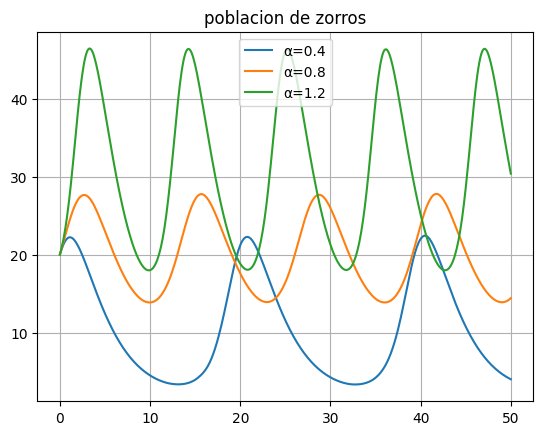

In [18]:
plt.plot(sa1.t,sa1.y[1],label="α=0.4")
plt.plot(sa2.t,sa2.y[1],label="α=0.8")
plt.plot(sa3.t,sa3.y[1],label="α=1.2")
plt.grid()
plt.legend()
plt.title("poblacion de zorros")

Text(0.5, 1.0, 'poblacion de conejos')

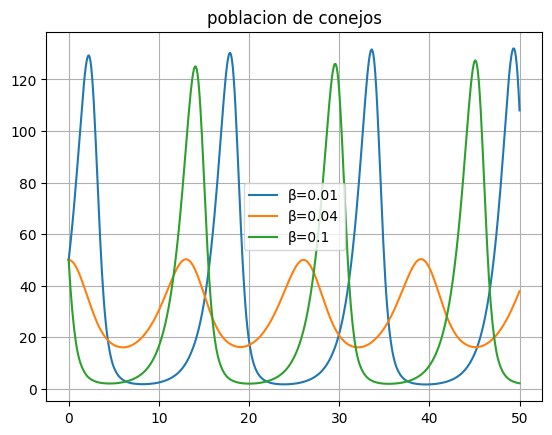

In [19]:
b1=0.01
b2=0.04
b3=0.1
def fb1(t,y0):
  x,y=y0
  dx=a*x-b1*x*y
  dy=-r*y+d*x*y
  return np.array([dx,dy],dtype=float)
def fb2(t,y0):
  x,y=y0
  dx=a*x-b2*x*y
  dy=-r*y+d*x*y
  return np.array([dx,dy],dtype=float)
def fb3(t,y0):
  x,y=y0
  dx=a*x-b3*x*y
  dy=-r*y+d*x*y
  return np.array([dx,dy],dtype=float)
sb1=sct.solve_ivp(fb1,t_s,y0,t_eval=np.arange(0,50+h,h))
sb2=sct.solve_ivp(fb2,t_s,y0,t_eval=np.arange(0,50+h,h))
sb3=sct.solve_ivp(fb3,t_s,y0,t_eval=np.arange(0,50+h,h))
plt.plot(sb1.t,sb1.y[0],label="β=0.01")
plt.plot(sb2.t,sb2.y[0],label="β=0.04")
plt.plot(sb3.t,sb3.y[0],label="β=0.1")
plt.grid()
plt.legend()
plt.title("poblacion de conejos")

Text(0.5, 1.0, 'poblacion de zorros')

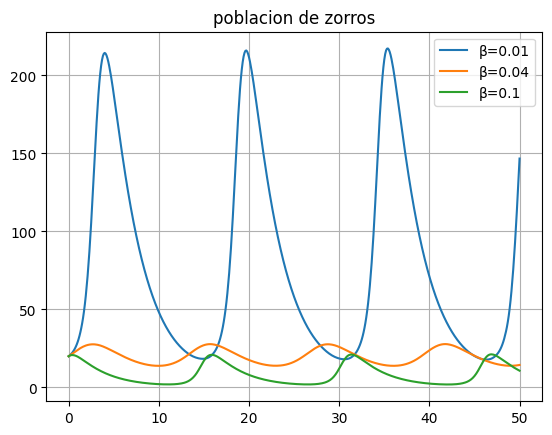

In [20]:
plt.plot(sb1.t,sb1.y[1],label="β=0.01")
plt.plot(sb2.t,sb2.y[1],label="β=0.04")
plt.plot(sb3.t,sb3.y[1],label="β=0.1")
plt.grid()
plt.legend()
plt.title("poblacion de zorros")

Text(0.5, 1.0, 'poblacion de conejos')

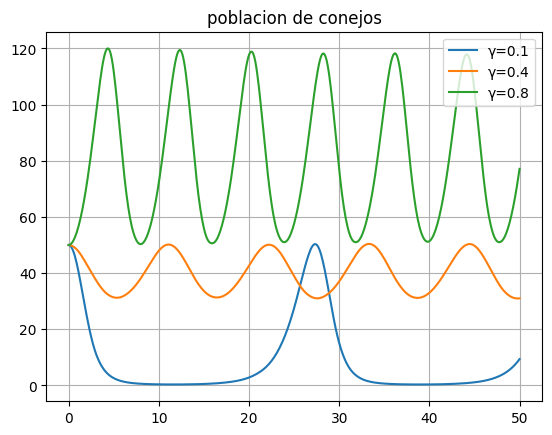

In [21]:
r1=0.1
r2=0.4
r3=0.8
def fr1(t,y0):
  x,y=y0
  dx=a*x-b*x*y
  dy=-r1*y+d*x*y
  return np.array([dx,dy],dtype=float)
def fr2(t,y0):
  x,y=y0
  dx=a*x-b*x*y
  dy=-r2*y+d*x*y
  return np.array([dx,dy],dtype=float)
def fr3(t,y0):
  x,y=y0
  dx=a*x-b*x*y
  dy=-r3*y+d*x*y
  return np.array([dx,dy],dtype=float)
sr1=sct.solve_ivp(fr1,t_s,y0,t_eval=np.arange(0,50+h,h))
sr2=sct.solve_ivp(fr2,t_s,y0,t_eval=np.arange(0,50+h,h))
sr3=sct.solve_ivp(fr3,t_s,y0,t_eval=np.arange(0,50+h,h))
plt.plot(sr1.t,sr1.y[0],label="γ=0.1")
plt.plot(sr2.t,sr2.y[0],label="γ=0.4")
plt.plot(sr3.t,sr3.y[0],label="γ=0.8")
plt.grid()
plt.legend()
plt.title("poblacion de conejos")

Text(0.5, 1.0, 'poblacion de zorros')

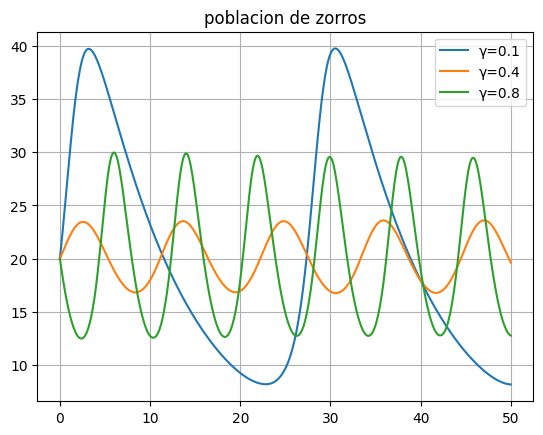

In [22]:
plt.plot(sr1.t,sr1.y[1],label="γ=0.1")
plt.plot(sr2.t,sr2.y[1],label="γ=0.4")
plt.plot(sr3.t,sr3.y[1],label="γ=0.8")
plt.grid()
plt.legend()
plt.title("poblacion de zorros")

Text(0.5, 1.0, 'poblacion de conejos')

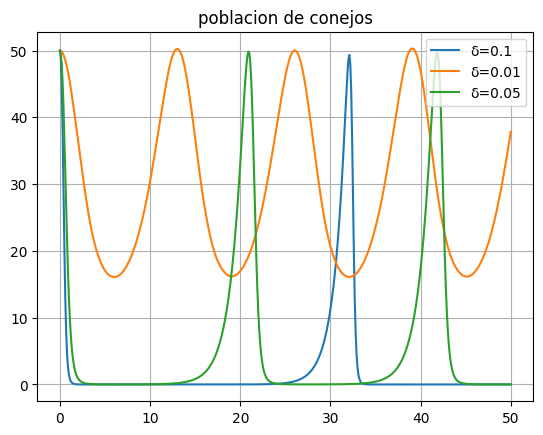

In [23]:
d1=0.1
d2=0.01
d3=0.05
def fd1(t,y0):
  x,y=y0
  dx=a*x-b*x*y
  dy=-r*y+d1*x*y
  return np.array([dx,dy],dtype=float)
def fd2(t,y0):
  x,y=y0
  dx=a*x-b*x*y
  dy=-r*y+d2*x*y
  return np.array([dx,dy],dtype=float)
def fd3(t,y0):
  x,y=y0
  dx=a*x-b*x*y
  dy=-r*y+d3*x*y
  return np.array([dx,dy],dtype=float)
sd1=sct.solve_ivp(fd1,t_s,y0,t_eval=np.arange(0,50+h,h))
sd2=sct.solve_ivp(fd2,t_s,y0,t_eval=np.arange(0,50+h,h))
sd3=sct.solve_ivp(fd3,t_s,y0,t_eval=np.arange(0,50+h,h))
plt.plot(sd1.t,sd1.y[0],label="δ=0.1")
plt.plot(sd2.t,sd2.y[0],label="δ=0.01")
plt.plot(sd3.t,sd3.y[0],label="δ=0.05")
plt.grid()
plt.legend()
plt.title("poblacion de conejos")

Text(0.5, 1.0, 'poblacion de zorros')

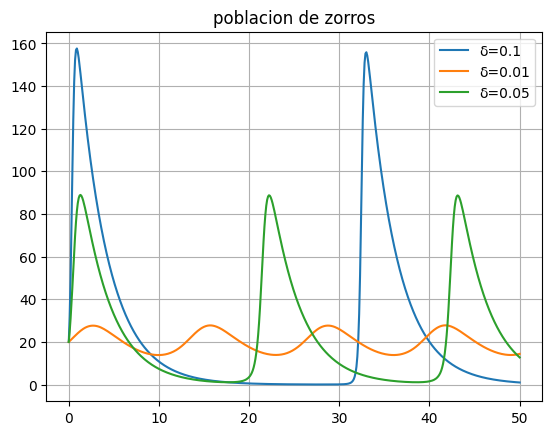

In [24]:
plt.plot(sd1.t,sd1.y[1],label="δ=0.1")
plt.plot(sd2.t,sd2.y[1],label="δ=0.01")
plt.plot(sd3.t,sd3.y[1],label="δ=0.05")
plt.grid()
plt.legend()
plt.title("poblacion de zorros")

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


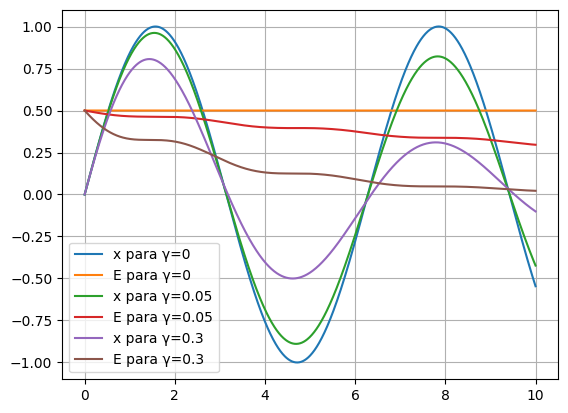

In [37]:
#a
m=1
k=1
w0=(k/m)**(1/2)
F=0
r=[0,0.05,0.3]
def E(x,v):
  return (1/2)*m*v**2+(1/2)*k*x**2
y0=np.array([0,1])
ts=(0,10)
h=0.01
for r in r:
  def f(t,y0):
    x,v=y0
    dx=v
    dv=(F/m)-r*v-w0**2*x
    return np.array([dx,dv],dtype=float)
  s=sct.solve_ivp(f,ts,y0,t_eval=np.arange(0,10+h,h))
  e=E(s.y[0],s.y[1])
  plt.plot(s.t,s.y[0],label="x para γ="+str(r))
  plt.plot(s.t,e,label="E para γ="+str(r))
  plt.grid()
  plt.legend()

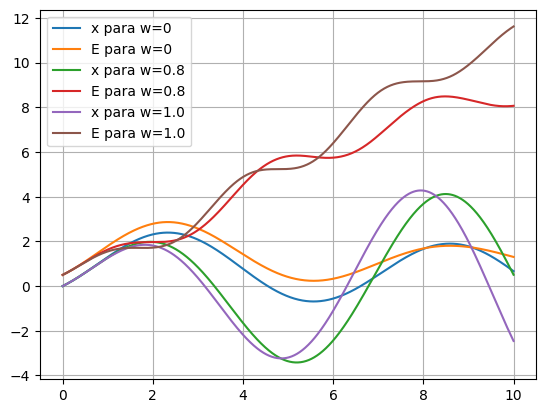

In [38]:
#b
r=0
T=10
f0=1
w=[0,w0*0.8,w0]
def F(t,w):
  return f0*np.cos(w*t)*np.exp((-t**2)/(T**2))
for w in w:
  def f(t,y0):
    x,v=y0
    dx=v
    dv=(F(t,w)/m)-r*v-w0**2*x #??? w0 o w
    return np.array([dx,dv],dtype=float)
  s=sct.solve_ivp(f,ts,y0,t_eval=np.arange(0,10+h,h))
  e=E(s.y[0],s.y[1])
  plt.plot(s.t,s.y[0],label="x para w="+str(w))
  plt.plot(s.t,e,label="E para w="+str(w))
  plt.grid()
  plt.legend()

# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

In [27]:
#a
x=sp.symbols("x")
y=sp.symbols("y")
m1=np.random.randint(1e2,1e6)
m2=np.random.randint(1e2,1e6)
w=1
u=m2/(m1+m2)
l4=np.array([1/2-u,(3**(1/2))/2])
l5=np.array([1/2-u,-(3**(1/2))/2])
r1=((x+u)**2+y**2)**(1/2)
r2=((x-1+u)**2+y**2)**(1/2)
U=-(u/r1)-((1-u)/r2)-1/2*w**2*(x**2+y**2)
a=sp.diff(U,x,2)
a=sp.lambdify([x,y],a)
a=a(l4[0],l4[1])
b=sp.diff(U,x,y)
b=sp.lambdify([x,y],b)
b=b(l4[0],l4[1])
c=sp.diff(U,y,x)
c=sp.lambdify([x,y],c)
c=c(l4[0],l4[1])
d=sp.diff(U,y,2)
d=sp.lambdify([x,y],d)
d=d(l4[0],l4[1])
A=np.array([[0,1,0,0],
            [a,0,b,2*w],
            [0,0,0,1],
            [c,-2*w,d,0]],dtype=float)
val,vet=np.linalg.eig(A)
print(val)
#dado que casi siempre hay parte imaginaria por lo que tiene valores complejos entonces es estable

[ 2.22044605e-16+2.60784666j  2.22044605e-16-2.60784666j
 -4.16333634e-17+0.44624635j -4.16333634e-17-0.44624635j]


In [28]:
#b
u=np.linspace(0,0.5,100)
valores = np.zeros(100)
for i, u in enumerate(u):
 l4=np.array([1/2-u,(3**(1/2))/2])
 l5=np.array([1/2-u,-(3**(1/2))/2])
 r1=((x+u)**2+y**2)**(1/2)
 r2=((x-1+u)**2+y**2)**(1/2)
 U=-(u/r1)-((1-u)/r2)-1/2*w**2*(x**2+y**2)
 a=sp.diff(U,x,2)
 a=sp.lambdify([x,y],a)
 a=a(l4[0],l4[1])
 b=sp.diff(U,x,y)
 b=sp.lambdify([x,y],b)
 b=b(l4[0],l4[1])
 c=sp.diff(U,y,x)
 c=sp.lambdify([x,y],c)
 c=c(l4[0],l4[1])
 d=sp.diff(U,y,2)
 d=sp.lambdify([x,y],d)
 d=d(l4[0],l4[1])
 A=np.array([[0,1,0,0],
            [a,0,b,2*w],
            [0,0,0,1],
            [c,-2*w,d,0]],dtype=float)
 val,vet=np.linalg.eig(A)
 valores[i] = val[0]
 print("u:",u)
 print(val)

/tmp/ipython-input-1623841591.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  valores[i] = val[0]


u: 0.0
[ 1.11022302e-16+2.64575131j  1.11022302e-16-2.64575131j
 -8.79635781e-09+0.j          8.79635786e-09+0.j        ]
u: 0.005050505050505051
[-2.22044605e-16+2.6448348j  -2.22044605e-16-2.6448348j
  1.16863442e-16+0.06963399j  1.16863442e-16-0.06963399j]
u: 0.010101010101010102
[ 1.11022302e-16+2.64392602j  1.11022302e-16-2.64392602j
 -8.15320034e-17+0.09826083j -8.15320034e-17-0.09826083j]
u: 0.015151515151515152
[-1.11022302e-16+2.64302502j -1.11022302e-16-2.64302502j
 -5.90077032e-17+0.12007797j -5.90077032e-17-0.12007797j]
u: 0.020202020202020204
[-1.11022302e-16+2.64213185j -1.11022302e-16-2.64213185j
  2.10077723e-16+0.13834487j  2.10077723e-16-0.13834487j]
u: 0.025252525252525256
[ 2.22044605e-16+2.64124653j  2.22044605e-16-2.64124653j
 -3.38271078e-17+0.15432682j -3.38271078e-17-0.15432682j]
u: 0.030303030303030304
[ 0.00000000e+00+2.64036911j  0.00000000e+00-2.64036911j
 -1.38344197e-16+0.16867406j -1.38344197e-16-0.16867406j]
u: 0.03535353535353536
[2.22044605e-16+2.6394

In [29]:
#c.1
m1=1.989e30
m2=5.972e24
w=1
u=m2/(m1+m2)
l4=np.array([1/2-u,(3**(1/2))/2])
l5=np.array([1/2-u,-(3**(1/2))/2])
r1=((x+u)**2+y**2)**(1/2)
r2=((x-1+u)**2+y**2)**(1/2)
U=-(u/r1)-((1-u)/r2)-1/2*w**2*(x**2+y**2)
a=sp.diff(U,x,2)
a=sp.lambdify([x,y],a)
a=a(l4[0],l4[1])
b=sp.diff(U,x,y)
b=sp.lambdify([x,y],b)
b=b(l4[0],l4[1])
c=sp.diff(U,y,x)
c=sp.lambdify([x,y],c)
c=c(l4[0],l4[1])
d=sp.diff(U,y,2)
d=sp.lambdify([x,y],d)
d=d(l4[0],l4[1])
A=np.array([[0,1,0,0],
            [a,0,b,2*w],
            [0,0,0,1],
            [c,-2*w,d,0]],dtype=float)
val,vet=np.linalg.eig(A)
print(val)
#como tiene valores complejos es estable

[ 1.11022302e-16+2.64575076e+00j  1.11022302e-16-2.64575076e+00j
 -4.61830950e-17+1.70154783e-03j -4.61830950e-17-1.70154783e-03j]


In [30]:
#c.2
m1=1.989e30
m2=1.898e27
u=m2/(m1+m2)
l4=np.array([1/2-u,(3**(1/2))/2])
l5=np.array([1/2-u,-(3**(1/2))/2])
r1=((x+u)**2+y**2)**(1/2)
r2=((x-1+u)**2+y**2)**(1/2)
U=-(u/r1)-((1-u)/r2)-1/2*w**2*(x**2+y**2)
a=sp.diff(U,x,2)
a=sp.lambdify([x,y],a)
a=a(l4[0],l4[1])
b=sp.diff(U,x,y)
b=sp.lambdify([x,y],b)
b=b(l4[0],l4[1])
c=sp.diff(U,y,x)
c=sp.lambdify([x,y],c)
c=c(l4[0],l4[1])
d=sp.diff(U,y,2)
d=sp.lambdify([x,y],d)
d=d(l4[0],l4[1])
A=np.array([[0,1,0,0],
            [a,0,b,2*w],
            [0,0,0,1],
            [c,-2*w,d,0]],dtype=float)
val,vet=np.linalg.eig(A)
print(val)
#como tiene valores complejos es estable

[-1.11022302e-16+2.64557772j -1.11022302e-16-2.64557772j
  1.46367293e-17+0.03030734j  1.46367293e-17-0.03030734j]


# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


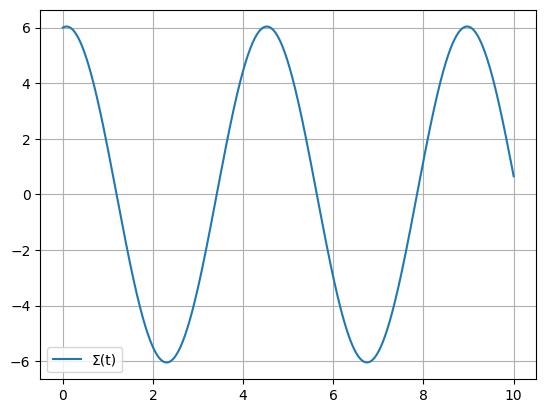

In [31]:
#a
v0=1
r=1
y1=np.random.randint(1,10)
y2=np.random.randint(1,10)
o=v0/r
k=2**(1/2)*o
def f(t,y0):
  e1,e2=y0
  de1=e2
  de2=-(k**2)*e1
  return np.array([de1,de2])
y0=np.array([y1,y2])
ts=(0,10)
h=0.01
s=sct.solve_ivp(f,ts,y0,t_eval=np.arange(0,10+h,h))
plt.plot(s.t,s.y[0],label="Σ(t)")
plt.grid()
plt.legend()

In [32]:
#b
A=np.array([[0,1],
           [-k**2,0]],dtype=float)
val,vet=np.linalg.eig(A)
print("valores propios:",val)
#dado que los valores propios solo tiene parte imaginaria entonces es estable

valores propios: [0.+1.41421356j 0.-1.41421356j]


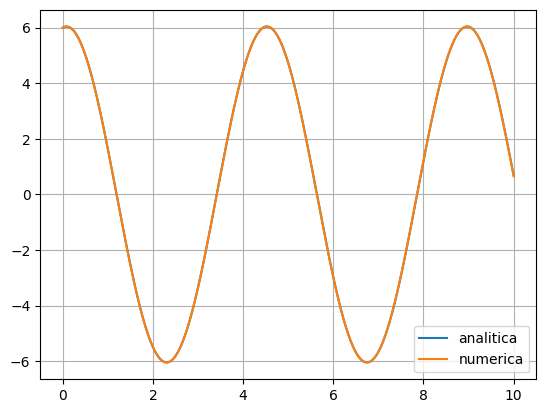

In [33]:
#c
def e(t):
  return y0[0]*np.cos(k*t)+(y0[1]/k)*np.sin(k*t)
plt.plot(s.t,e(s.t),label="analitica")
plt.plot(s.t,s.y[0],label="numerica")
plt.grid()
plt.legend()

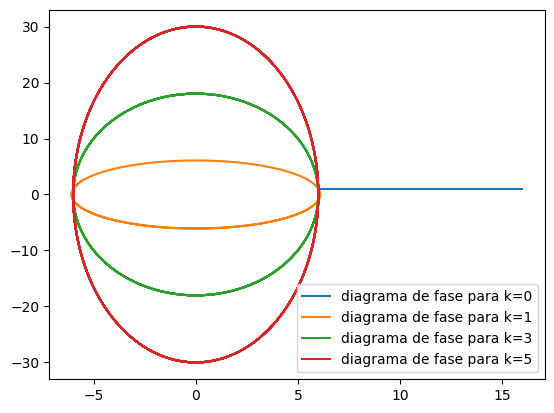

In [34]:
#d
kv=np.array([0,1,3,5])
for k in kv:
  def f(t,y0):
    e1,e2=y0
    de1=e2
    de2=-(k**2)*e1
    return np.array([de1,de2])
  s=sct.solve_ivp(f,ts,y0,t_eval=np.arange(0,10+h,h))
  plt.plot(s.y[0],s.y[1],label="diagrama de fase para k="+str(k))
  plt.grid()
  plt.legend()
# mientras mas grande es el k mas inestable es el sistema

# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

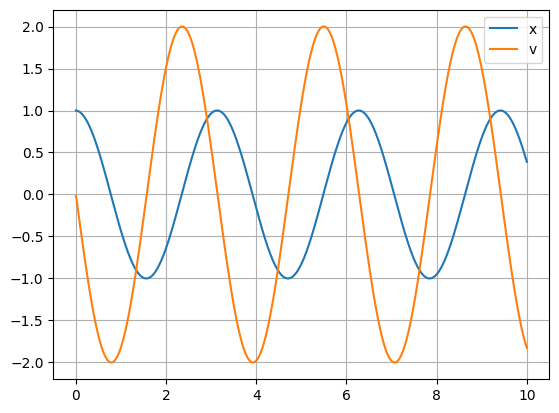

In [35]:
def leapfrog(f,t0,tf,x0,v0,h):
  n=int((tf-t0)/h)
  xn=np.zeros(n+1)
  vn=np.zeros(n+1)
  xn[0]=x0
  vn[0]=v0+f(x0)*(h/2)
  v_1_2=vn[0]
  for i in range(n):
    v1_2=v_1_2+f(xn[i])*h
    xn[i+1]=xn[i]+v1_2*h
    vn[i+1]=v1_2-f(xn[i+1])*(h/2)
    v_1_2=v1_2
  return xn,vn
w=2
def f(x):
  return -w**2*x
x0=1
v0=0
t0=0
tf=10
h=0.01
x,v=leapfrog(f,t0,tf,x0,v0,h)
m=len(x)
t=np.arange(0,10+h,h)
plt.plot(t,x,label="x")
plt.plot(t,v,label="v")
plt.legend()
plt.grid()